<a href="https://colab.research.google.com/github/tanziul/Compiler-Design/blob/main/Assignment_2%5BNN%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the necessary Libraries**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score


Function to generate random data with 4 classes

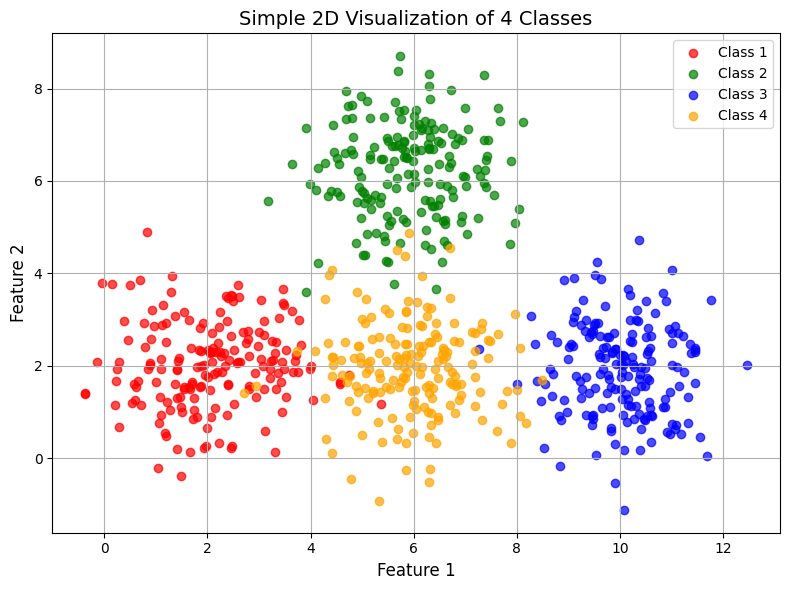

In [5]:


def generate_data(samples_per_class=180):
    np.random.seed(32)
    class1 = np.random.randn(samples_per_class, 2) + np.array([2, 2])
    class2 = np.random.randn(samples_per_class, 2) + np.array([6, 6])
    class3 = np.random.randn(samples_per_class, 2) + np.array([10, 2])
    class4 = np.random.randn(samples_per_class, 2) + np.array([6, 2])  # New class added

    X = np.vstack([class1, class2, class3, class4])
    y = np.array([0]*samples_per_class + [1]*samples_per_class +
                 [2]*samples_per_class + [3]*samples_per_class)

    return X, y

# Generate data
X, y = generate_data()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 1', alpha=0.7)
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green', label='Class 2', alpha=0.7)
plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='blue', label='Class 3', alpha=0.7)
plt.scatter(X[y==3][:, 0], X[y==3][:, 1], color='orange', label='Class 4', alpha=0.7)  # New class

# Labels and title
plt.title("Simple 2D Visualization of 4 Classes", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

Split the data into training, validation, and test sets

In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

Print the sizes of the splits

In [8]:

print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 432 samples
Validation set: 144 samples
Test set: 144 samples


Define the custom neural network class with 4 hidden layer

In [21]:
class NeuralNet:
    def __init__(self, input_size, h1, h2, h3, h4, output_size, lr):
        self.W1 = np.random.randn(input_size, h1)
        self.W2 = np.random.randn(h1, h2)
        self.W3 = np.random.randn(h2, h3)
        self.W4 = np.random.randn(h3, h4)
        self.W5 = np.random.randn(h4, output_size)
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self, x):
        self.z1 = np.dot(x, self.W1)
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W3)
        self.a3 = self.sigmoid(self.z3)

        self.z4 = np.dot(self.a3, self.W4)
        self.a4 = self.sigmoid(self.z4)

        self.z5 = np.dot(self.a4, self.W5)
        self.output = self.sigmoid(self.z5)
        return self.output

    def backprop(self, x, y, output):
        error = y - output
        delta5 = error * self.sigmoid(output, derivative=True)

        error4 = np.dot(delta5, self.W5.T)
        delta4 = error4 * self.sigmoid(self.a4, derivative=True)

        error3 = np.dot(delta4, self.W4.T)
        delta3 = error3 * self.sigmoid(self.a3, derivative=True)

        error2 = np.dot(delta3, self.W3.T)
        delta2 = error2 * self.sigmoid(self.a2, derivative=True)

        error1 = np.dot(delta2, self.W2.T)
        delta1 = error1 * self.sigmoid(self.a1, derivative=True)

        # Update weights
        self.W5 += np.dot(self.a4.T, delta5) * self.lr
        self.W4 += np.dot(self.a3.T, delta4) * self.lr
        self.W3 += np.dot(self.a2.T, delta3) * self.lr
        self.W2 += np.dot(self.a1.T, delta2) * self.lr
        self.W1 += np.dot(x.T, delta1) * self.lr

    def train(self, x, y):
        output = self.feed_forward(x)
        self.backprop(x, y, output)


Train the Neural Network with 4 hidden layer

In [22]:
input_size = X_train.shape[1]
hidden_size1 = 15
hidden_size2 = 15
hidden_size3 = 15
hidden_size4 = 15  # 4th hidden layer
output_size = y_train.shape[1]
lr = 0.001
epochs = 2000

nn = NeuralNet(input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size, lr)

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    nn.train(X_train, y_train)
    train_output = nn.feed_forward(X_train)
    val_output = nn.feed_forward(X_val)

    train_loss = np.mean((y_train - train_output) ** 2)
    val_loss = np.mean((y_val - val_output) ** 2)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_output, axis=1))
    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_output, axis=1))
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
              f"Train Accuracy = {train_accuracy * 100:.2f}%, Validation Accuracy = {val_accuracy * 100:.2f}%")


Epoch 0: Train Loss = 0.3688, Validation Loss = 0.3661, Train Accuracy = 23.84%, Validation Accuracy = 25.69%
Epoch 50: Train Loss = 0.1760, Validation Loss = 0.1758, Train Accuracy = 71.30%, Validation Accuracy = 72.22%
Epoch 100: Train Loss = 0.1594, Validation Loss = 0.1592, Train Accuracy = 73.61%, Validation Accuracy = 71.53%
Epoch 150: Train Loss = 0.1411, Validation Loss = 0.1405, Train Accuracy = 74.07%, Validation Accuracy = 72.92%
Epoch 200: Train Loss = 0.1232, Validation Loss = 0.1220, Train Accuracy = 74.54%, Validation Accuracy = 74.31%
Epoch 250: Train Loss = 0.1114, Validation Loss = 0.1095, Train Accuracy = 76.39%, Validation Accuracy = 76.39%
Epoch 300: Train Loss = 0.1021, Validation Loss = 0.0997, Train Accuracy = 78.24%, Validation Accuracy = 78.47%
Epoch 350: Train Loss = 0.0945, Validation Loss = 0.0917, Train Accuracy = 79.63%, Validation Accuracy = 81.94%
Epoch 400: Train Loss = 0.0882, Validation Loss = 0.0850, Train Accuracy = 81.02%, Validation Accuracy = 84

Visualize Loss and Accuracy

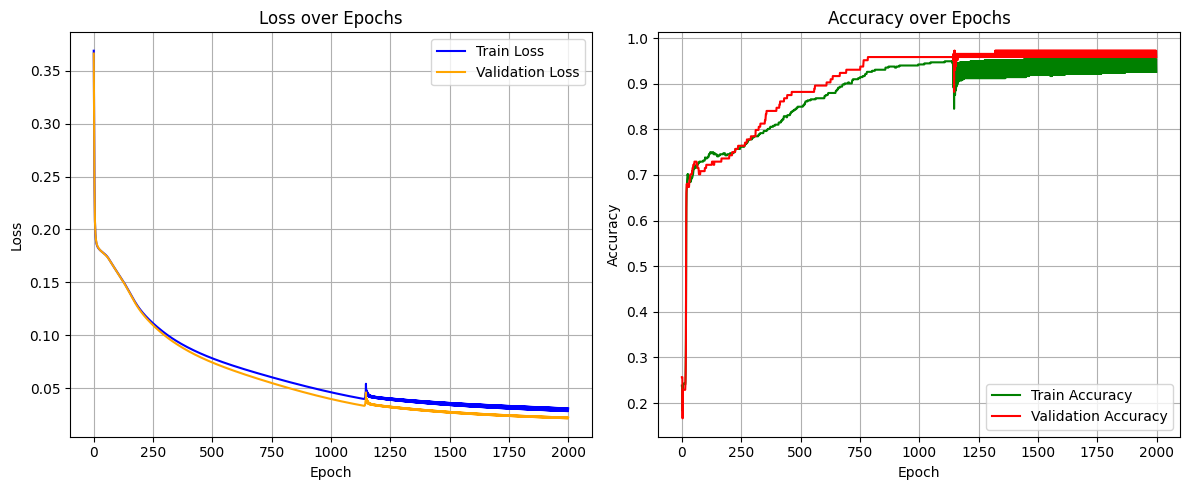

In [23]:
# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', color='green')
plt.plot(val_accuracies, label='Validation Accuracy', color='red')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Evaluate the Model

In [24]:
test_output = nn.feed_forward(X_test)
predicted_classes = np.argmax(test_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

Calculate Accuracy

In [25]:
test_accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 97.22%


Plot Actual Vs Predicted

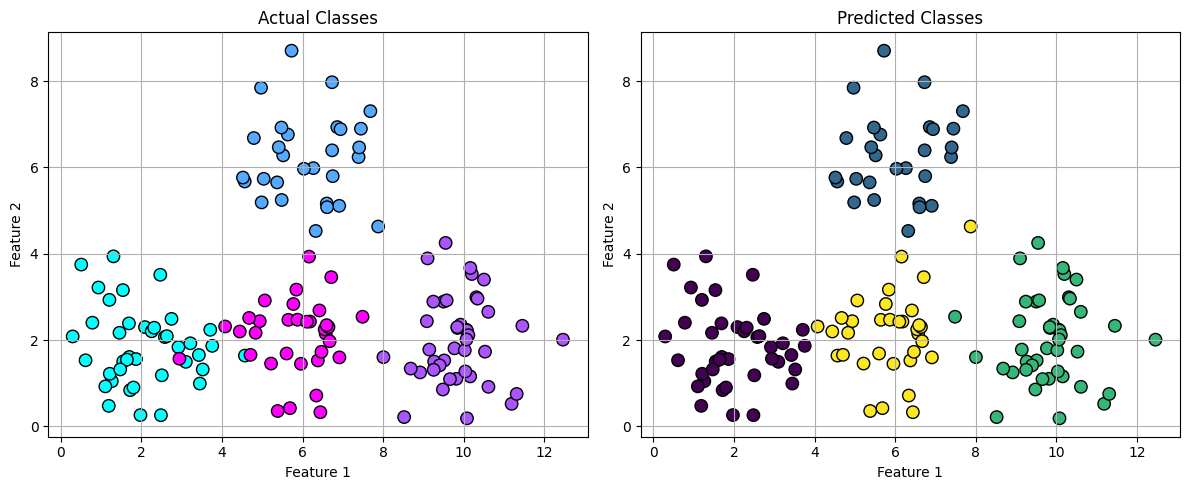

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Predict
predicted_output = nn.feed_forward(X_test)
predicted_classes = np.argmax(predicted_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot actual classes
axs[0].scatter(X_test[:, 0], X_test[:, 1], c=actual_classes, cmap='cool', edgecolor='k', s=80)
axs[0].set_title('Actual Classes')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].grid(True)

# Plot predicted classes
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap='viridis', edgecolor='k', s=80)
axs[1].set_title('Predicted Classes')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Decision Boundary Plot

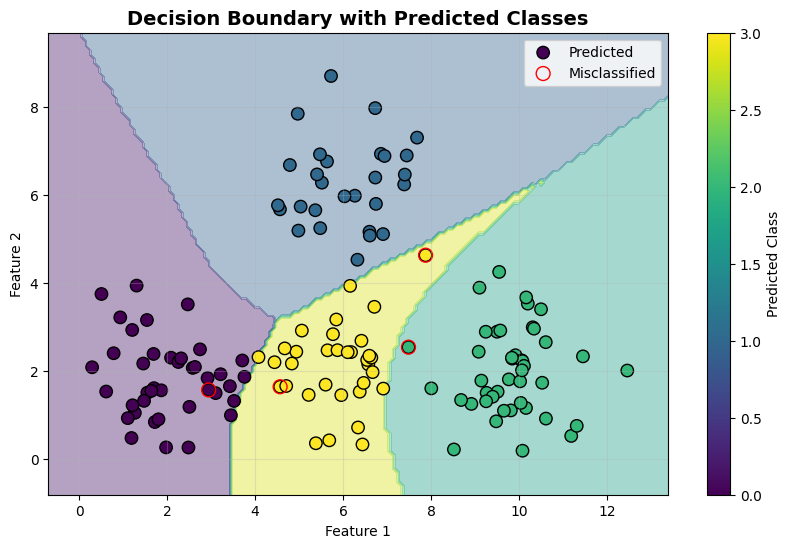

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Predict output from the neural network
predicted_output = nn.feed_forward(X_test)
predicted_classes = np.argmax(predicted_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Generate meshgrid for decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict classes for each meshgrid point
grid_input = np.c_[xx.ravel(), yy.ravel()]
Z = np.argmax(nn.feed_forward(grid_input), axis=1)
Z = Z.reshape(xx.shape)

# Plot decision boundary and predictions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.4)

# Plot predicted test points
scatter = plt.scatter(X_test[:, 0], X_test[:, 1],
                      c=predicted_classes, cmap='viridis',
                      edgecolor='k', s=80, label='Predicted')

# Highlight actual misclassified points (optional)
misclassified = predicted_classes != actual_classes
plt.scatter(X_test[misclassified, 0], X_test[misclassified, 1],
            facecolors='none', edgecolors='r', s=100, label='Misclassified')

# Add labels and grid
plt.title("Decision Boundary with Predicted Classes", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, alpha=0.3)
plt.legend(loc="best")

# Colorbar
plt.colorbar(scatter, label="Predicted Class")

# Show plot
plt.show()
